### EDA on E-Commerce Shipping Dataset
### Performing Classification [Computer learns from the data and identifies which set does each record belong to] on the Train Dataset

#### Task Details
##### Use Advance Visualization to illustrate if the shipments have reached on-time for the customers who have the best customer rating, the best customer score, made recurring orders and high payments

In [103]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import os
import sys
import csv

from collections import defaultdict, Counter

from sklearn.neighbors import KNeighborsClassifier # Classifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

sb.set_style("darkgrid")
sb.set(font_scale = 1.2)

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 10000)

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
df = pd.read_csv("D:\Open Classroom\Data Files\E-Commerce Shipping Dataset - Classification\Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


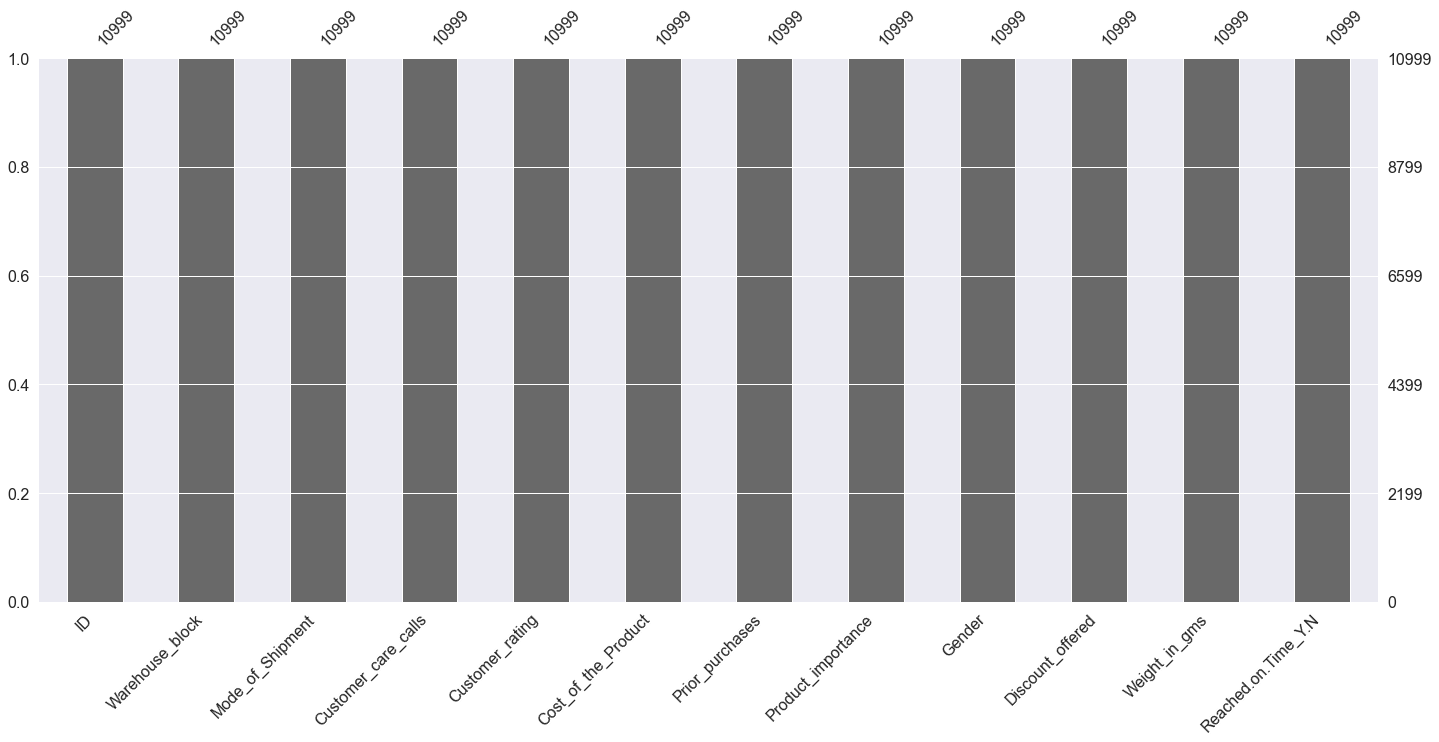

In [4]:
msno.bar(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
round(df.describe(), 2)

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00
mean,5500.00,4.05,2.99,210.20,3.57,13.37,3634.02,0.60
std,3175.28,1.14,1.41,48.06,1.52,16.21,1635.38,0.49
min,1.00,2.00,1.00,96.00,2.00,1.00,1001.00,0.00
25%,2750.50,3.00,2.00,169.00,3.00,4.00,1839.50,0.00
50%,5500.00,4.00,3.00,214.00,3.00,7.00,4149.00,1.00
75%,8249.50,5.00,4.00,251.00,4.00,10.00,5050.00,1.00
max,10999.00,7.00,5.00,310.00,10.00,65.00,7846.00,1.00


In [14]:
print("Warehouse Block: \n", df["Warehouse_block"].value_counts(), "\n\nShipment mode: \n", df["Mode_of_Shipment"].value_counts())

Warehouse Block: 
 F    3666
D    1834
C    1833
A    1833
B    1833
Name: Warehouse_block, dtype: int64 

Shipment mode: 
 Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64


In [126]:
x_train = df[["Mode_of_Shipment", "Cost_of_the_Product"]]
y_train = df["Reached.on.Time_Y.N"]

le = LabelEncoder()
x_train = x_train.apply(le.fit_transform) # Using the Label Encoder to fit the model and transform train data to machine-readable

model = KNeighborsClassifier(n_neighbors = 10, algorithm = "brute")

model.fit(x_train, y_train)

print("Number of Neighbors : ", model.n_neighbors)

pred = model.predict(x_train)
print("\n\nPrediction :\n", pred)

train_acc_score = accuracy_score(y_train, pred)
print("Accuracy Score : ", train_acc_score * 100)

Number of Neighbors :  10


Prediction :
 [1 1 1 ... 0 1 1]
Accuracy Score :  58.723520320029095


In [128]:
target = pd.DataFrame(pred, columns = ["Target"])
target[["Mode_of_Shipment", "Cost_of_the_Product", "Reached.on.Time_Y.N"]] = df[["Mode_of_Shipment", "Cost_of_the_Product", "Reached.on.Time_Y.N"]]
target = target[["Mode_of_Shipment", "Cost_of_the_Product", "Reached.on.Time_Y.N", "Target"]]
target.head()

,Mode_of_Shipment,Cost_of_the_Product,Reached.on.Time_Y.N,Target
0,Flight,177,1,1
1,Flight,216,1,1
2,Flight,183,1,1
3,Flight,176,1,1
4,Flight,184,1,0


Text(0.5, 1.0, 'Shipment For Product \nShowing whether the Shipment Reached on Time to Customer(s)')

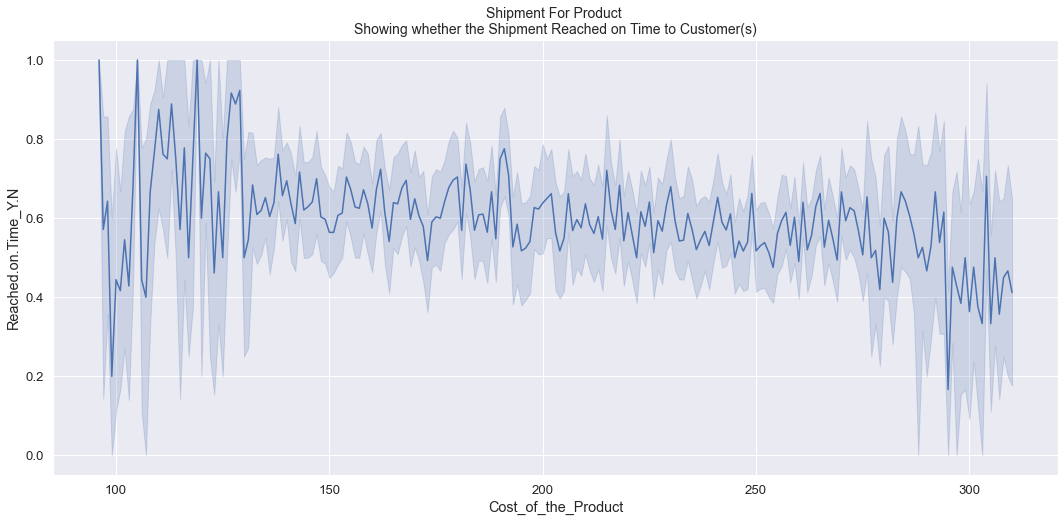

In [144]:
target = pd.DataFrame(pred, columns = ["Target"])
target[["Mode_of_Shipment", "Cost_of_the_Product", "Reached.on.Time_Y.N"]] = df[["Mode_of_Shipment", "Cost_of_the_Product", "Reached.on.Time_Y.N"]]
target = target[["Mode_of_Shipment", "Cost_of_the_Product", "Reached.on.Time_Y.N", "Target"]]
target

plt.figure(figsize = (18, 8))
sb.lineplot(x = target["Cost_of_the_Product"], y = target["Reached.on.Time_Y.N"], data = target)#, hue = "Mode_of_Shipment")
plt.title("Shipment For Product \nShowing whether the Shipment Reached on Time to Customer(s)", fontdict = {"fontsize": 14})

#sb.lineplot(x = target["Cost_of_the_Product"], y = target["Target"], data = target)

Mode_of_Shipment
Ship      1569580
Flight     371938
Road       370437
Name: Cost_of_the_Product, dtype: int64

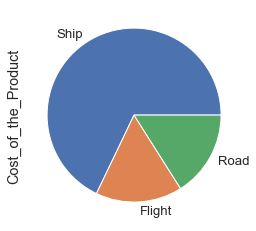

In [94]:
shipment = df.groupby("Mode_of_Shipment").agg("sum").sort_values(by = "Cost_of_the_Product", ascending = False)
shipment["Cost_of_the_Product"].plot(kind = "pie")
shipment["Cost_of_the_Product"]

In [146]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [147]:
df["Customer_rating"].value_counts()

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

In [175]:
#rating = df.groupby("Customer_rating")
rating = df["Customer_rating"] > 3
top_rating = pd.DataFrame(df[rating])
top_rating.head()
#sb.lineplot(x = df["Customer_rating"], y = df["ID"])

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
10,11,C,Flight,3,4,189,2,medium,M,12,2888,1
11,12,F,Flight,4,5,232,3,medium,F,32,3253,1


In [200]:
cust_score = df[["Mode_of_Shipment", "Customer_care_calls"]]
mode = cust_score.groupby("Mode_of_Shipment")
mode["Customer_care_calls"].value_counts().to_frame()

Customer_care_calls
Mode_of_Shipment Customer_care_calls                     
Flight           4                                    565
                 3                                    498
                 5                                    420
                 6                                    164
                 2                                     91
                 7                                     39
Road             4                                    597
                 3                                    499
                 5                                    369
                 6                                    169
                 2                                     95
                 7                                     31
Ship             4                                   2395
                 3                                   2220
                 5                                   1539
                 6                                    680
                 2                                    452
                 7                                    176